In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 모집단과 표본

df = pd.read_csv("data/ch4_scores400.csv")
df.shape
scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
np.random.choice([1,2,3],3, replace = False)

array([1, 2, 3])

In [4]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [5]:
# 표본 평균
sample.mean()

70.4

In [6]:
# 모집단 평균
scores.mean()

69.53

In [7]:
samples = np.random.choice(scores, (10000, 20))
means = samples.mean(axis=1)
print(round(means.mean(), 2))

69.55


In [8]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21,3/21,4/21,5/21,6/21]

np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice,num_trial, p = prob)
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [9]:
freq, _ = np.histogram(sample, bins = 6, range = (1,7))
print(freq)
rdf = pd.DataFrame({"frequency" : freq, "relatiive frequency" : freq/num_trial},
                  index = pd.Index(np.arange(1,7), name = "dice"))
rdf

[ 6 12 12 20 24 26]


,frequency,relatiive frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


Text(0, 0.5, 'relative frequency')

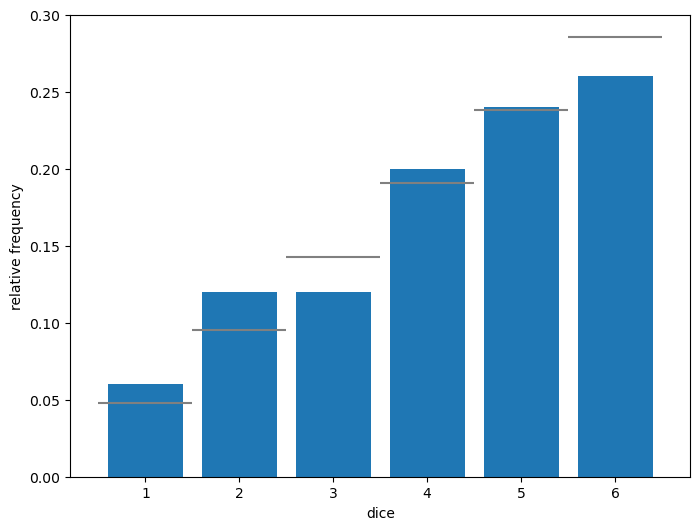

In [10]:
np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice,num_trial, p = prob)

plt.figure(figsize = (8,6))
plt.hist(sample, bins=6, range = (1,7), density = True, rwidth = 0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors = "gray")
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7))
plt.xlabel("dice")
plt.ylabel("relative frequency")

In [11]:
sample = np.random.choice(scores, 10000)

In [12]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

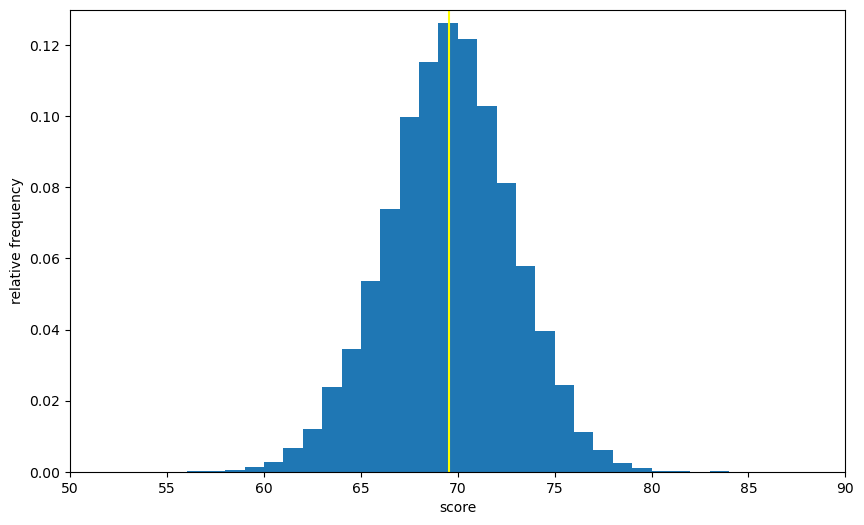

In [13]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다.

fig = plt.figure(figsize = (10,6))
plt.hist(sample_means, bins = 100, range = (0,100), density = True)

plt.vlines(np.mean(scores),0,1,"yellow")
plt.axis([50,90,0,0.13])
plt.xlabel("score")
plt.ylabel("relative frequency")
plt.show()

확률의 수학적 정의와 의미
- 표본공간 과 확률표본
 * 확률표본 또는 표본은 풀고자 하는 문제에서 발생할 수 있는 하나의 현상 혹은 선택될 수 있는 하나의 경우를 말한다.
 * 표본공간은 가능한 모든 표본의 집합을 말하며 고려하는 범위에서 어떤 표본(경우, 현상)이 가능하고 어떤 표본이 가능하지 않은가를 정의하는 작업. 표본공간 = {H,T}, (표본 : H(동전의 앞면), T(동전의 뒷면))
 * 사건은 표본공간의 부분집합, 즉 전체 표본공간 중에서 관심을 가지는 일부 표본의 집합
 
확률
- 확률이란 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수
- 모든 각각의 사건(부분집합)에 어떤 숫자를 할당하는 함수
- 확률은 표본이 아닌 사건을 입력으로 가지는 함수

확률의 의미
- 빈도주의 관점 : 반복적으로 선택된 표본이 사건(부분집합) A의 원소가 될 경향. 동전을 던져 앞면이 나오는 사건의 확률값은 0.5
- 베이지안 관점 : 선택된 표본이 특정한 사건(부분집합)에 속한다는 가설,명제 혹은 주장의 신뢰도로 반복이라는 개념은 사용되지 않음. 새가 날수 있는 가능성은 95%. '앞면이 나왔다'는 주장의 신뢰도가 0.5%
 * 베이지안 확률론에서 사건이 일어났다 혹은 발생했다하는 말은 그 사건의 원소 중에 정말로 선택된 표본이 있다는 사실을 알게 되었다는 것을 말한다.
 
확률의 성질
- 공집합의 확률 : 공집합인 사건의 합은 0이다. P(0) = 0
- 여집합의 확률 : 어떤 사건의 여집합인 사건의 확률은 1 - 원래 사건의 확률 과 같다.
- 포함-배제 원리 : 두 사건의 합집합의 확률은 각 사건의 확률의 합에서 두 사건의 교집합의 확률을 뺀 것과 같다.
- 전체 확률의 법칙 : 생일이 1월인 남자라는 사건의 확률과 생일이 2월인 남자라는 사건의 확률, 이외에도 각각의 월을 생일로 가지는 남자라는 사건들의 확률을 모두 합하면 남자라는 사건의 확률이 된다. 각각의 월에 있는 남자의 생일이 서로 공통 원소가 없음

확률분포함수
- 확률이 어디에 어느 정도 분포되어 있는지를 수학적으로 명시하고 전달하는 도구
- 만약 표본의 개수가 무한하다면 현실적으로 모든 사건을 하나 하나 기술하는 것은 불가능하며 확률분포함수를 이용하여 이 문제를 해결
 * 확률질량함수 : 유한 개의 사건이 존재하는 경우 각 단수사건에 대한 확률만 정의하는 함수
 * 누적분포함수 : 시작점을 모두 또같이 음의 무한대로 통일한 특수한 구간을 사용하는 사건의 확률분포를 묘사하는 함수
 * 확률밀도함수 : 누적분포함수를 미분하여 구한 도함수를 의미하며 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마난 높은가를 나타내는 것이며 그 값 자체가 확률은 아니다.

확률변수
 - 확률적인 숫자 값을 출력하는 변수

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.

확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다. 이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 샘플 크기가 커질수록 이론적인 확률 값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하에 데이터를 수집하고, 그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.

- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며, 이론적인 확률값에 근접하도록 데이터 크기를 늘립니다. 반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다. 빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을 어떤 사건이 일어날 가능성으로 이해합니다. 이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다. 예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연어 처리 분야 등에서 사용됩니다.

빈도주의 관점은 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다. 이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.

- 100번의 실험을 수행해서 앞면이 60번 나왔다면, 앞면이 나올 확률은 0.6, 즉 60%입니다. 이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.

- 이와 같은 방법으로, 빈도주의 관점은 대규모 데이터를 바탕으로 통계적 추론을 수행하는 분야에서 많이 사용됩니다. 예를 들어, 의학 연구에서는 수많은 환자 데이터를 바탕으로 질병 발생 확률을 계산하고, 이를 바탕으로 예방 방법을 제시합니다. 또한, 마케팅 연구에서는 대규모 데이터를 바탕으로 소비자의 구매 확률을 계산하고, 이를 바탕으로 마케팅 전략을 수립합니다.

- 즉, 빈도주의 관점에서는 반복적인 실험을 통해 데이터를 모으고, 이를 바탕으로 확률을 계산합니다. 이를 통해 대규모 데이터에서 일어날 가능성을 추정하고, 이를 바탕으로 데이터 분석 및 예측을 수행합니다.

베이지안 관점은 확률을 "사건이 일어날 가능성"으로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 암 환자 진단 문제를 생각해봅시다. 어떤 환자가 암에 걸렸을 때, 병원에서 검사를 통해 양성 판정이 나왔다고 가정해봅시다. 이 때, 베이지안 관점에서는 이 결과가 실제로 환자가 암에 걸렸음을 의미하는가에 대한 확률을 계산합니다.

- 베이지안 관점에서는 이 확률을 "사전 확률"이라고 부릅니다. 즉, 검사를 통해 양성 판정이 나오기 전에는 이 환자가 암에 걸렸을 확률을 이미 가정하고 있었다는 것입니다. 예를 들어, 이전의 암 환자들의 데이터를 분석하여, 이 환자가 암에 걸렸을 확률을 0.1, 즉 10%로 가정하였다고 합시다.

- 그리고, 이제 검사를 통해 양성 판정이 나왔다고 가정합니다. 이 때, 검사 결과가 양성일 때 암에 걸렸을 확률을 계산하는 것이 베이지안 관점입니다. 이를 "사후 확률"이라고 부르며, 사전 확률과 검사 결과를 고려하여 계산됩니다.

- 예를 들어, 이전의 암 환자들의 데이터에서 암에 걸린 환자 중 80%가 양성 판정을 받았다고 가정합니다. 이러한 정보를 바탕으로, 이 환자가 암에 걸렸을 사후 확률은 다음과 같이 계산됩니다.

사전 확률: 10%
우도(검사 결과가 양성일 확률): 80%
사후 확률: (10% x 80%) / (10% x 80% + 90% x 20%) = 30.8%

즉, 이 환자가 검사 결과가 양성인 경우에는 암에 걸렸을 확률이 30.8%입니다.

예를 들어, 여러분이 복권을 사서 당첨이 되었다고 가정해봅시다. 그리고 당첨된 복권의 확률을 계산하고자 합니다. 이 때, 베이지안 관점에서는 이 확률을 "사후 확률"로 계산합니다.

- 우선, 이 복권의 당첨 확률을 사전 지식으로 가정합니다. 예를 들어, 이 복권이 얼마나 팔렸는지, 이전의 당첨 데이터는 어떻게 되는지 등의 정보를 바탕으로, 사전 확률을 0.001, 즉 0.1%로 가정합니다.

- 그리고, 복권을 구매한 사람들 중에서 몇 명이 당첨되었는지 데이터를 수집합니다. 이를 바탕으로 우도, 즉 "당첨된 복권을 구매한 사람들의 비율"을 계산합니다.

- 예를 들어, 1,000,000 명이 복권을 구매하고, 그 중 1,000 명이 당첨되었다면, 우도는 0.001, 즉 0.1%입니다.

- 그리고, 이 사전 확률과 우도를 결합하여 사후 확률을 계산합니다. 이를 통해, 이 복권을 구매했을 때 당첨될 확률을 추정할 수 있습니다.


이와 같이, 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다. 이를 통해 데이터의 불확실성을 고려하여 예측과 의사결정을 수행합니다.

#### 추측통계
확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [14]:
from scipy import stats
population = stats.norm(loc = 4, scale = 0.8)
population.rvs(size = 10)

array([5.50751998, 4.76382449, 4.03080861, 4.32123669, 1.96316464,
       4.51734415, 4.38733196, 4.45889642, 3.23114544, 2.13509029])

In [15]:
sample_mean_array = np.zeros(10000)
for i in range(10000):
    sample_mean_array[i] = population.rvs(size = 10).mean()
    
sample_mean_array[:10]

array([4.03026366, 4.55166708, 3.75676128, 4.2409271 , 3.99473274,
       3.90802881, 3.90547746, 3.9716411 , 3.96753764, 3.77941479])

In [16]:
# 표본평균의 평균
sample_mean_array.mean().round(4)

4.0032

In [17]:
# 표본평균의 표준편차
sample_mean_array.std(ddof = 1).round(3)

0.253

<AxesSubplot:ylabel='Count'>

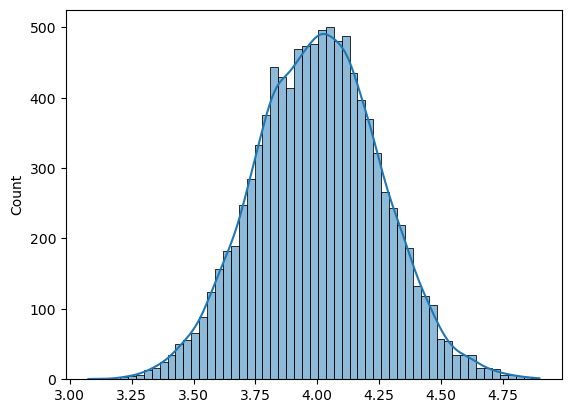

In [18]:
sns.histplot(sample_mean_array,kde = True)

In [19]:
size_array = np.arange(10,100100,100)
len(size_array)

1001

In [20]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [21]:
# 샘플 사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[:10]

array([3.92228729, 4.0383612 , 4.09185254, 4.01346562, 4.0047295 ,
       4.05765729, 3.98466861, 3.99126955, 3.98909837, 4.03638272])

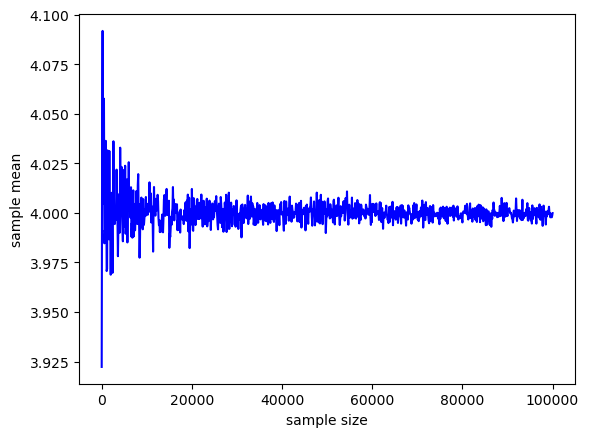

In [22]:
plt.plot(size_array, sample_mean_array_size, color = "b")
plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.show()

In [23]:
# 사용자 함수(표본평균 계산)
def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size = size).mean()
    return sample_mean_array
np.mean(cal_sample_mean(size = 10, n_trial = 100))

3.9823445434451776

#### 과제2_0411
상기 사용자 함수를 사용하여 샘플사이즈가 10, 20, 30이고 샘플 갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하시오.

In [24]:
a = cal_sample_mean(10,10000)
b = cal_sample_mean(20,10000)
c = cal_sample_mean(30,10000)

In [25]:
dfa = pd.DataFrame(a)
dfb = pd.DataFrame(b)
dfc = pd.DataFrame(c)

In [26]:
df = pd.concat([dfa, dfb, dfc], axis = 1)
df.columns = ["10","20","30"]
df

,10,20,30
0,3.777963,3.992801,4.260746
1,3.597987,3.743569,4.315976
2,3.989040,4.307684,4.136634
3,4.168588,4.090426,4.304582
4,3.498606,3.901853,3.948140
...,...,...,...
9995,3.722925,4.314812,4.151166
9996,3.866373,4.093753,4.033155
9997,4.103247,3.997697,3.773247
9998,4.151676,3.727123,4.031223


<AxesSubplot:>

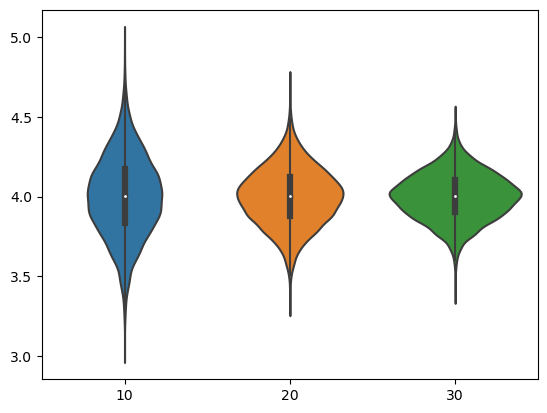

In [27]:
sns.violinplot(df)

In [28]:
# 정규분포의 확률밀도 계산

stats.norm.pdf(loc = 4, scale = 0.8, x = 4)# pdf = probability density function

0.49867785050179086

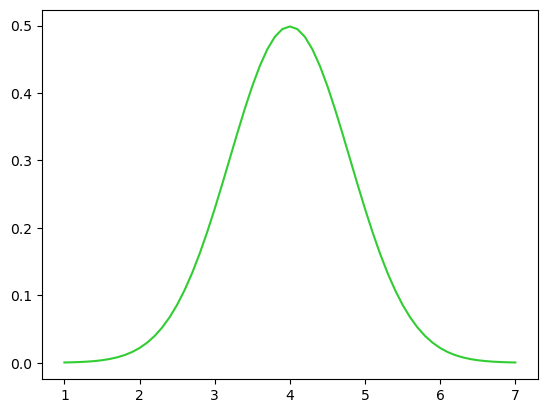

In [29]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = "limegreen")

In [30]:
# 동일 함수에서 x=3일때의 확률을 구하라
stats.norm.pdf(loc = 4, scale = 0.8, x = 3) 

0.2283113567362774

stats.norm.cdf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다. 
- 정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

- stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

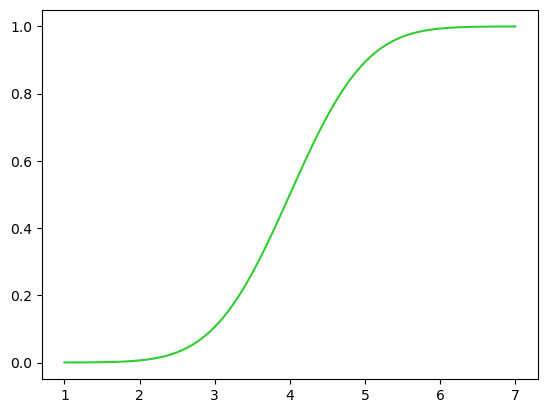

In [31]:
# 누적분포함수
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 4, scale = 0.8), color = "limegreen") # cdf = cumulative distribution function

In [32]:
# 평균이 5, 표준편차가 2인 정규분포에서 3 이하의 확률 계산
stats.norm.cdf(x = 3, loc = 5, scale = 2)

0.15865525393145707

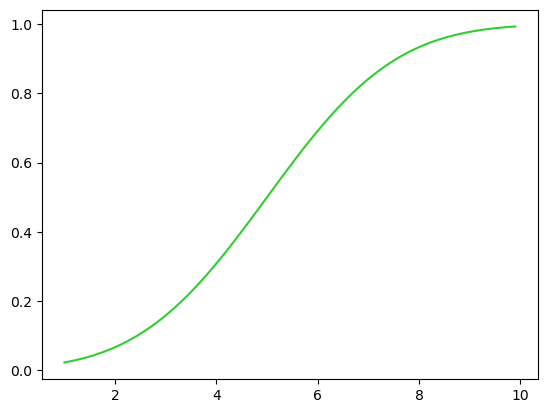

In [33]:
x_plot = np.arange(1,10,0.1)
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 5, scale = 2), color = "limegreen")

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [34]:
from scipy.stats import norm
x = norm.ppf(0.8, loc = 5, scale = 2)
print(x)

6.683242467145829


In [35]:
# 평균 4, 표준편차 0.8인 정규분포에서 확률이 0.5일 때의 분위수 값을 계산하시오.
norm.ppf(0.5, loc = 4, scale = 0.8)

4.0

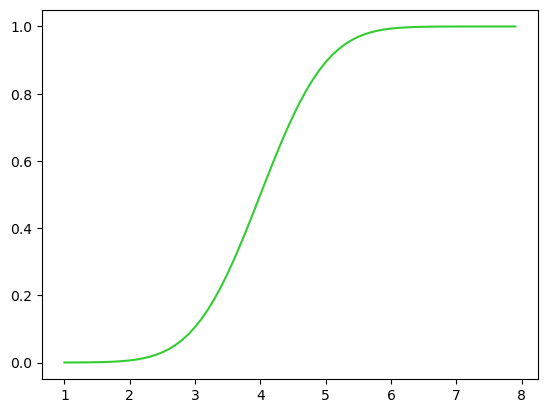

In [36]:
x_plot = np.arange(1,8,0.1)
plt.plot(x_plot, norm.cdf(x_plot, loc = 4, scale = 0.8), color = "limegreen")

#### 자유도
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.

t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)과 비교하여 검정을 수행합니다. 
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.

이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.

In [37]:
sample_data = [2.3, 3.5, 1.8, 4.1, 2.7]
sample_mean = sum(sample_data)/ len(sample_data)
sample_std = stats.tstd(sample_data)
pop_mean = 3
t_value = (sample_mean - pop_mean)/ (sample_std/ len(sample_data)**0.5)
t_value

-0.2907009498669058

In [38]:
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4)/sample_se

<AxesSubplot:ylabel='Count'>

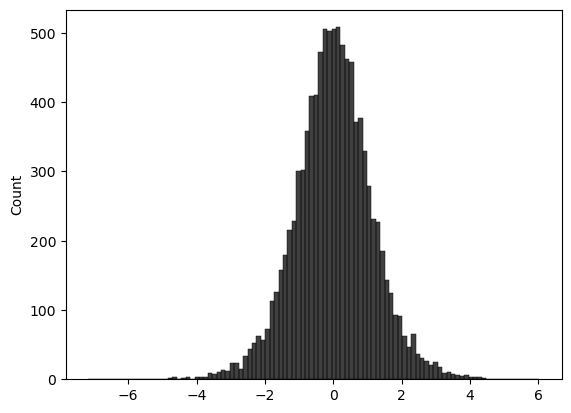

In [39]:
sns.histplot(t_value_array, color = "black")

C:\Users\h\AppData\Local\Temp\ipykernel_3236\3522894268.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array, color = "black")


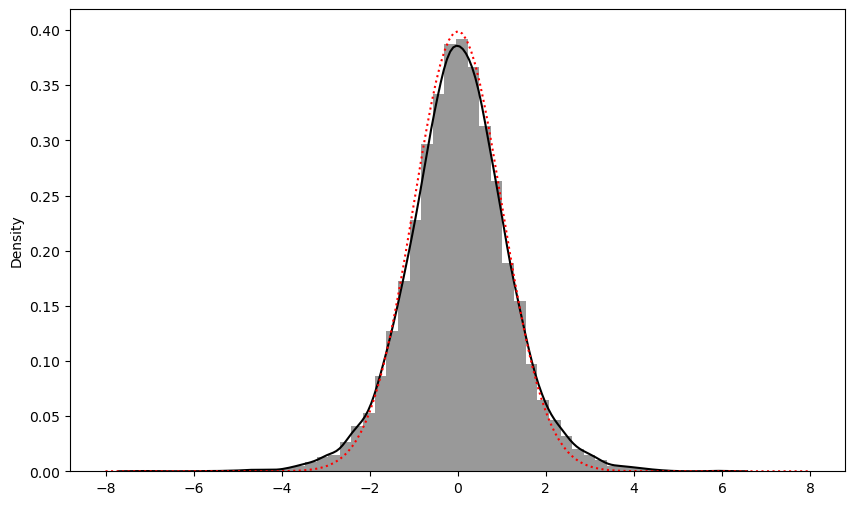

In [40]:
plt.figure(figsize = (10,6))
sns.distplot(t_value_array, color = "black")
x = np.arange(-8,8.1,0.1)
plt.plot(x, stats.norm.pdf(x=x), color = "red", linestyle = "dotted")

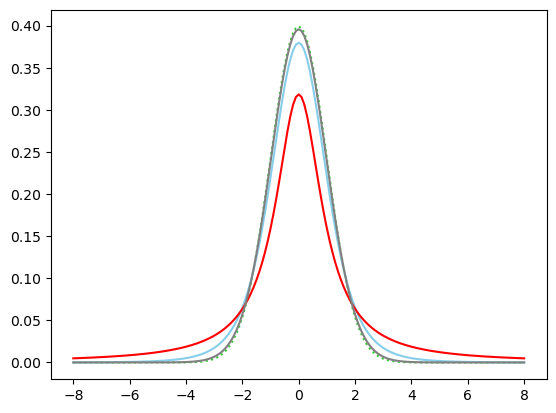

In [41]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1에 수렴)
plt.plot(x, stats.norm.pdf(x=x), color = "limegreen", linestyle = "dotted")
plt.plot(x, stats.t.pdf(x=x, df = 5), color = "skyblue")
plt.plot(x, stats.t.pdf(x=x, df = 1), color = "red")
plt.plot(x, stats.t.pdf(x=x, df = 30), color = "gray")

#### 과제 1_0412
pdf,cdf,ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 그 결과를 값과 그래프(확률밀도함수, 누적분포함수)로 출력하시오.

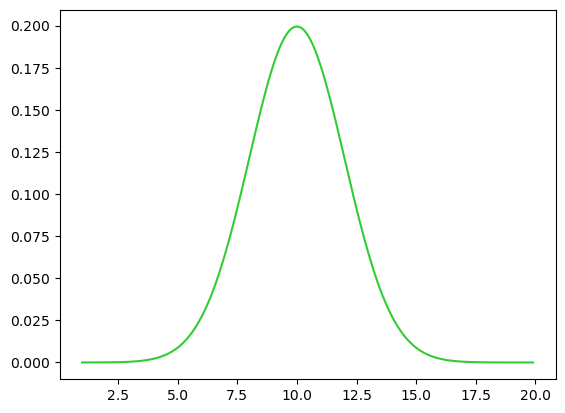

In [42]:
x_plot = np.arange(1,20,0.1)
plt.plot(x_plot,stats.norm.pdf(x = x_plot, loc = 10, scale = 2), color = "limegreen")  

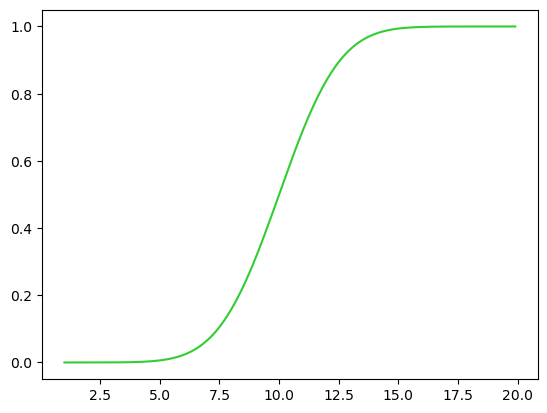

In [43]:
plt.plot(x_plot, stats.norm.cdf(x = x_plot, loc = 10, scale = 2), color = "limegreen")  

In [44]:
stats.norm.cdf(x = 12, loc = 10, scale = 2)

0.8413447460685429

In [45]:
stats.norm.ppf(0.95, loc = 10, scale = 2)

13.289707253902945

과제 2_0412
t분포의 자유도를 5개로 조정하면서 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지 확인할 수 있는 그래프를 출력하시오.

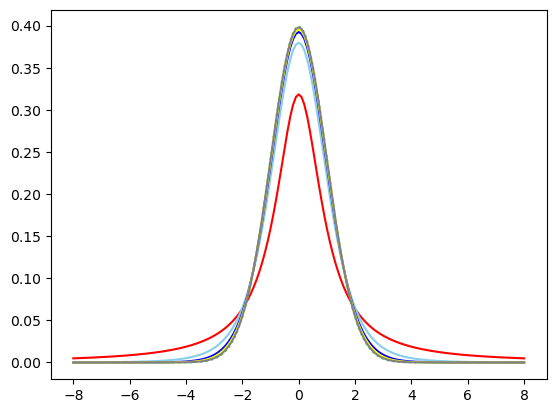

In [46]:
plt.plot(x, stats.norm.pdf(x=x), color = "limegreen", linestyle = "dotted")
plt.plot(x, stats.t.pdf(x=x, df = 1), color = "red")
plt.plot(x, stats.t.pdf(x=x, df = 5), color = "skyblue")
plt.plot(x, stats.t.pdf(x=x, df = 15), color = "blue")
plt.plot(x, stats.t.pdf(x=x, df = 30), color = "yellow")
plt.plot(x, stats.t.pdf(x=x, df = 100), color = "gray")

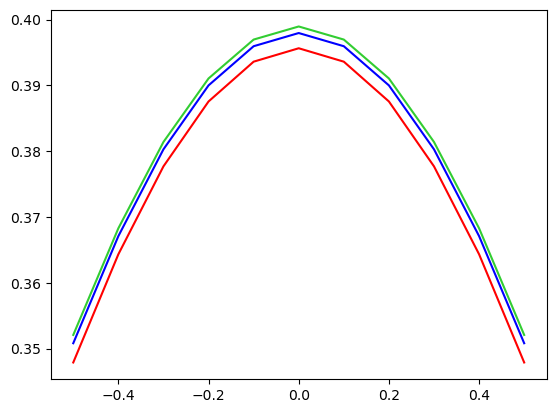

In [47]:
x_1 = x[(x >= -0.6) & (x <= 0.5)]
plt.plot(x_1, stats.norm.pdf(x=x_1), color = "limegreen")
plt.plot(x_1, stats.t.pdf(x=x_1, df = 30), color = "red")
plt.plot(x_1, stats.t.pdf(x=x_1, df = 100), color = "blue")

## 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰계수(신뢰수준)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
 - 샘플사이즈가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐

예를 들어, 100명의 학생들의 키를 측정하여 표본평균을 계산하였습니다. 이 때, 표본의 크기는 100이며, 표본평균은 170cm입니다. 이러한 데이터를 바탕으로 모집단의 평균을 추정하고자 합니다. 이 때, 신뢰구간을 이용하여 추정값의 신뢰도를 평가할 수 있습니다.

먼저, 신뢰수준(confidence level)을 설정합니다. 신뢰수준은 추정값이 구간 내에 존재할 확률로, 일반적으로 95%나 99%로 설정됩니다. 이번 예시에서는 신뢰수준을 95%로 설정하겠습니다.

다음으로, 표본의 크기와 분산을 이용하여 표준오차(standard error)를 계산합니다. 표준오차는 표본평균과 모집단 평균의 차이를 추정하는 데 사용되는 지표입니다. 표준오차를 계산하기 위해서는 표본평균의 표준편차(standard deviation)와 표본의 크기가 필요합니다. 이번 예시에서는 표본의 표준편차가 5cm, 표본의 크기가 100명이므로, 표준오차는 다음과 같이 계산됩니다.

표준오차 = 5 / sqrt(100) = 0.5

마지막으로, 추정값과 신뢰수준, 표준오차를 이용하여 신뢰구간을 계산합니다. 이번 예시에서는 95%의 신뢰수준을 가지고 있으므로, 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = 추정값 ± (신뢰계수 * 표준오차)
= 170 ± (1.96 * 0.5)
= (169.02, 170.98)

즉, 95%의 신뢰수준으로 모집단의 평균을 추정할 때, 표본평균은 약 169.02cm부터 170.98cm까지의 범위 내에 존재할 것으로 예상됩니다.

In [48]:
df = pd.read_csv('data/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [49]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [50]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)
4.19
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [51]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [52]:
df = len(fish) - 1
df

9

In [53]:
# 신뢰구간 : 신뢰수준 95%
import warnings
warnings.filterwarnings("ignore")
interval = stats.t.interval(alpha=0.95, df=df, loc=mu,scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [54]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
se2 = sigma*10/np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df,loc=mu,scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [55]:
# Q. 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2=(len(fish)*10)-1
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95,df=df2,loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [56]:
# 신뢰수준 95% vs 99%

stats.t.interval(alpha=0.99,df=df,loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

### 과제3_0412.
- 크기가 10인 표본 데이터를 생성하고 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [57]:
sample = np.array([np.random.random(10)*10])
a = sample.mean()
b = sample.std()

In [58]:
se = b/np.sqrt(len(sample))

In [59]:
stats.t.interval(alpha= 0.95, df = 9, loc = a, scale = se)

(-0.7192787620960335, 12.036384311389442)

### 과제4_0412.
- 어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

- 표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 표본의 크기를 무작위로 100으로 확대

In [60]:
sample = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])
a = sample.mean()
print(a)
b = sample.std()
se = b/np.sqrt(len(sample))

50.14


In [61]:
stats.t.interval(alpha = 0.95, df = len(sample)-1, loc = a, scale = se) 

(49.80569021277854, 50.47430978722146)

In [62]:
sample_1 = np.random.normal(a,b,10000)
a_1 = sample.mean()
b_1 = sample.std()
se_1 = b_1/np.sqrt(len(sample))

In [63]:
stats.t.interval(alpha = 0.95, df = len(sample_1)-1, loc = a_1, scale = se_1)

(49.850314350326364, 50.42968564967364)

In [65]:
df = pd.read_csv('data/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [66]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [67]:
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [68]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [69]:
df = len(fish) - 1
df

9

In [70]:
# 신뢰구간 : 신뢰수준 95%
interval = stats.t.interval(alpha=0.95, df=df, loc=mu,scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [71]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
se2 = sigma*10/np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df,loc=mu,scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [72]:
# Q. 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2=(len(fish)*10)-1
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95,df=df2,loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [73]:
# 신뢰수준 95% vs 99%

stats.t.interval(alpha=0.99,df=df,loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

### z분포와 t분포에서 신뢰구간 계산 방법의 차이

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. 하지만, z분포는 모집단의 표준편차를 알고 있을 때, t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다.

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다. z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다. 임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다. 표준편차는 표본의 분산의 제곱근입니다. n은 표본의 크기입니다. 반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

### 과제3_0412.
- 크기가 10인 표본 데이터를 생성하고 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [74]:
# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.30 ~ 1.68


In [75]:
# 10배로 샘플 사이즈 확대
import numpy as np
from scipy.stats import norm

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)*10

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*10)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.44 ~ 1.54


### 과제4_0412.
어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

- 표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 표본의 크기를 100배 확대

In [76]:
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [77]:
# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)*100

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*100)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 50.11 ~ 50.17


신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우

만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우

만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [78]:
# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std = 0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포)에 해당하는 z-score(표준편차 단위의 값)를 계산
z_val = norm.ppf((1 + conf_level) / 2) 

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


In [79]:
# 정규분포에서 95%의 구간을 구하기 위해 z-score를 계산합니다.
z = norm.ppf(0.975)

# z-score 출력
print(z)

1.959963984540054


In [80]:
# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# t값 계산
# t-분포에서 어떤 확률값(누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [81]:
# t-분포에서 95%의 구간을 구하기 위해 t-score를 계산합니다.
t_score = t.ppf(0.975, 9)

# t-score 출력
print(t_score)

2.2621571627409915
